<a href="https://colab.research.google.com/github/EyaAzzabi/Pcos_Prediction/blob/main/PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importation ***

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from collections import Counter

**Chargement du dataset**

In [4]:
# Chargement du dataset
df = pd.read_csv("pcos_dataset.csv")

**Affichage du dataset**

In [5]:
#affichage des 5 premiers lignes
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


**Les infos du dataset**

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [7]:
df.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [9]:
df.isnull().sum()


,0
Age,0
BMI,0
Menstrual_Irregularity,0
Testosterone_Level(ng/dL),0
Antral_Follicle_Count,0
PCOS_Diagnosis,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.corr()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
Age,1.000000,-0.049455,0.032300,-0.050129,0.017841,-0.064675
BMI,-0.049455,1.000000,0.031189,0.003811,0.030724,0.377852
Menstrual_Irregularity,0.032300,0.031189,1.000000,0.042694,0.035851,0.469376
Testosterone_Level(ng/dL),-0.050129,0.003811,0.042694,1.000000,0.011976,0.200817
Antral_Follicle_Count,0.017841,0.030724,0.035851,0.011976,1.000000,0.192014
PCOS_Diagnosis,-0.064675,0.377852,0.469376,0.200817,0.192014,1.000000


In [12]:
# Gestion des valeurs manquantes
df.fillna(df.median(), inplace=True)

In [ ]:
# Conversion des types de données
df = df.convert_dtypes()

In [ ]:
# Suppression des doublons
df.drop_duplicates(inplace=True)

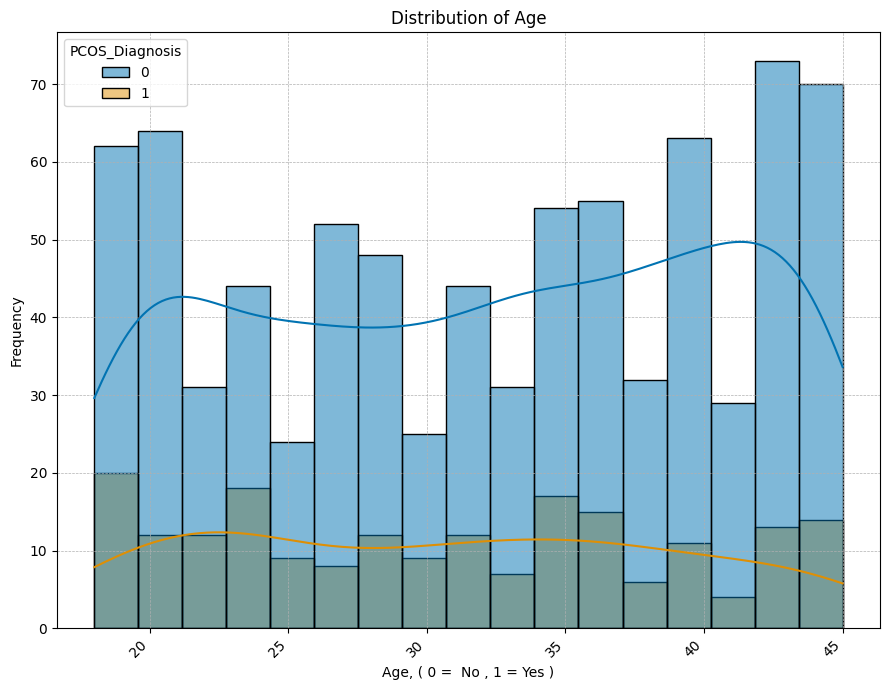

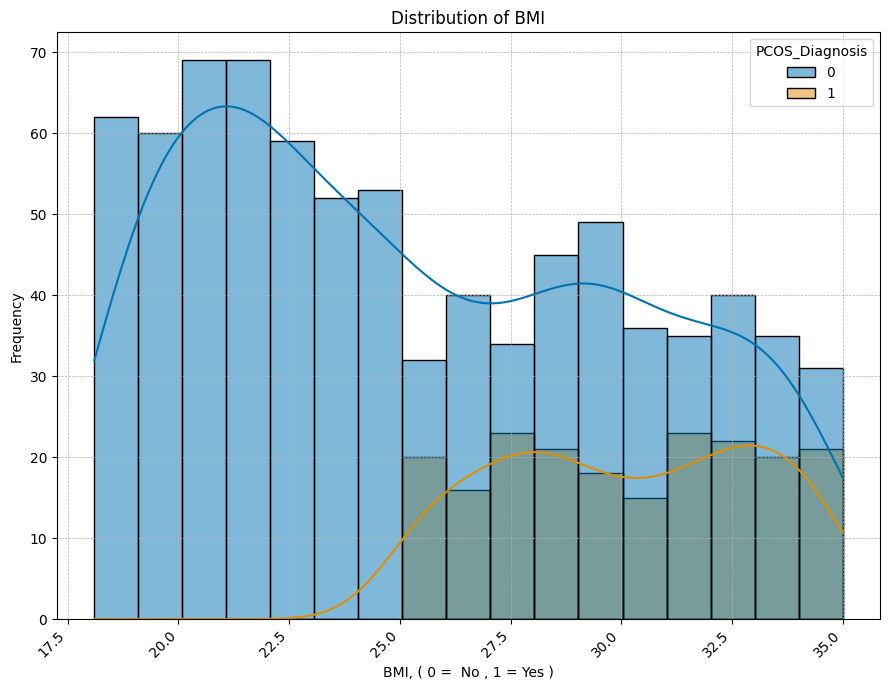

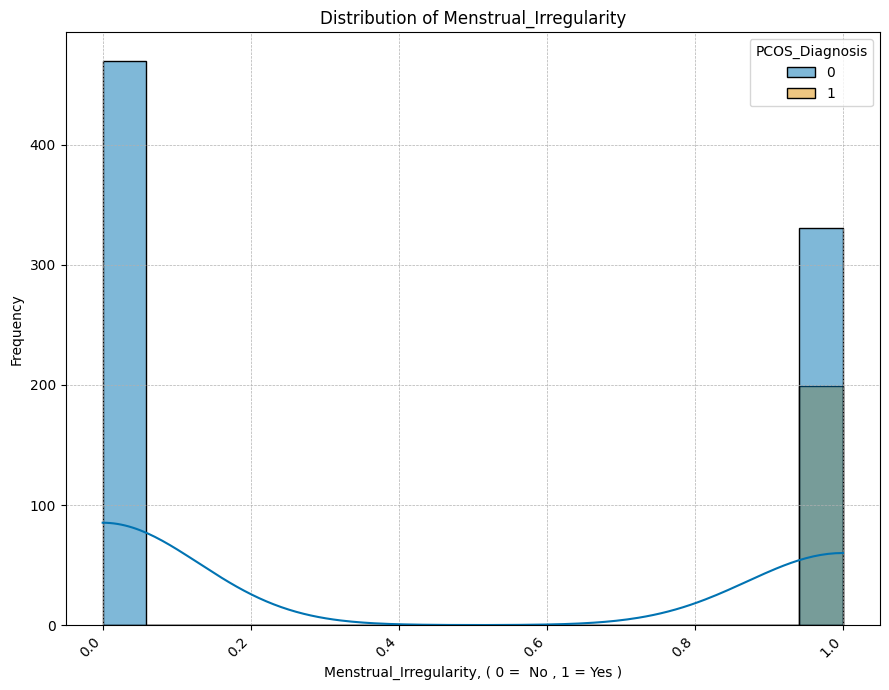

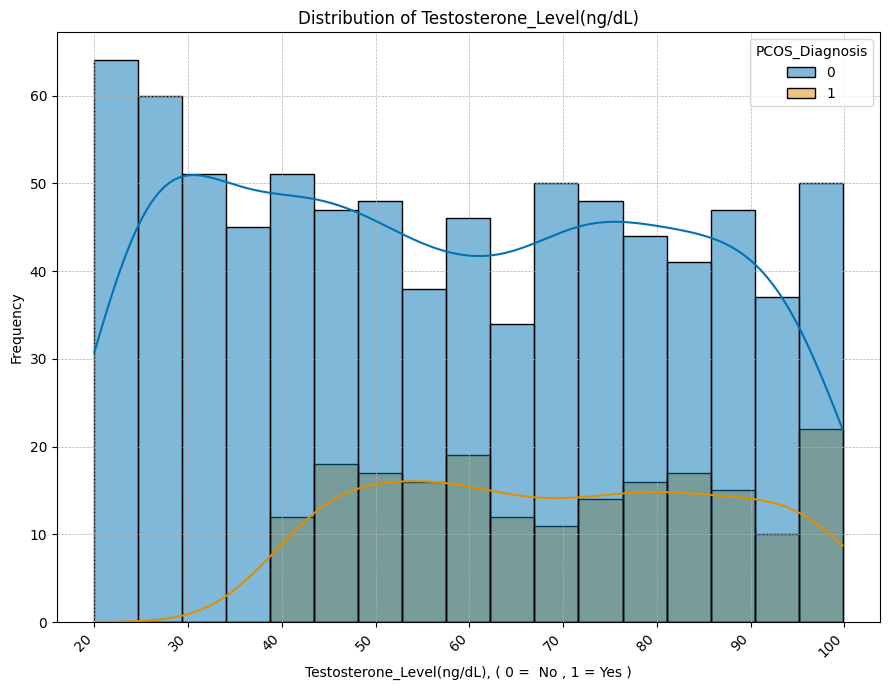

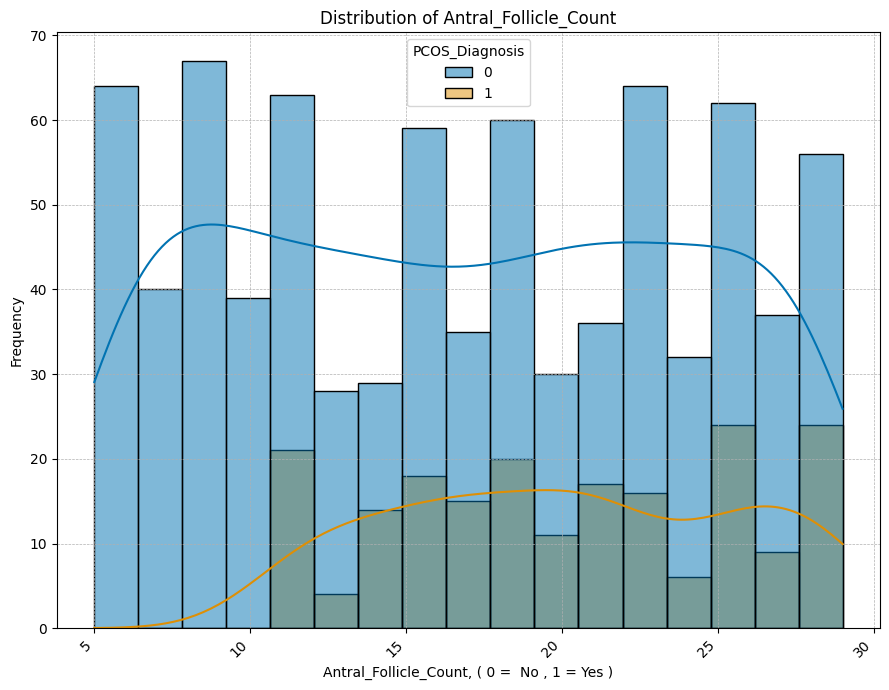

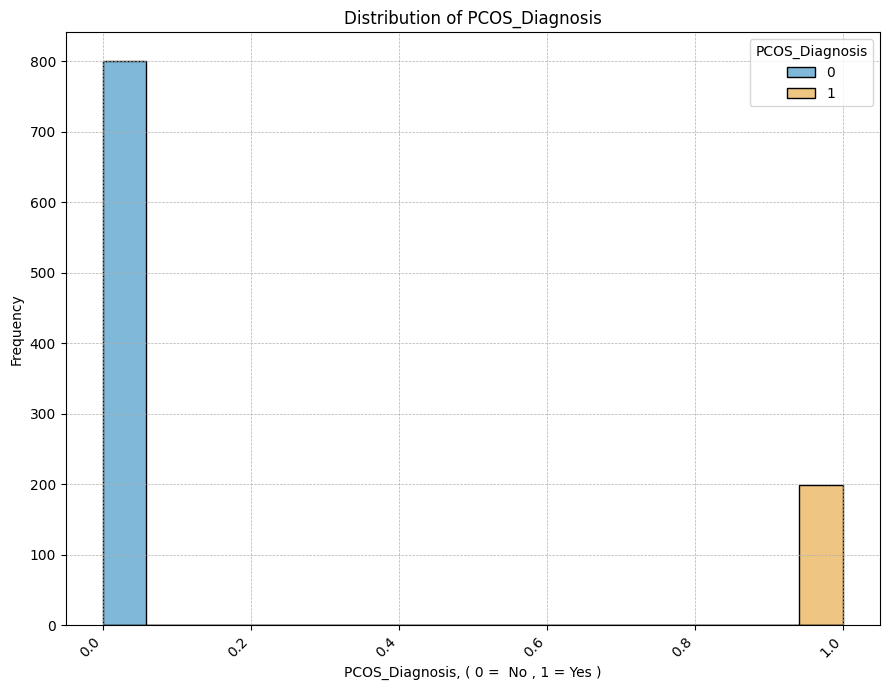

In [13]:
#visualisation des données:
for i in df.columns:
  plt.figure(figsize=(9,7))
  sns.histplot(x=i,kde=True,hue='PCOS_Diagnosis',palette='colorblind',data=df,bins=17)

  plt.xlabel(i+', ( 0 =  No , 1 = Yes )')
  plt.ylabel("Frequency")
  plt.title("Distribution of {}".format(i))
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.grid(linestyle = '--', linewidth = 0.5)
  plt.show()
  print("\n")

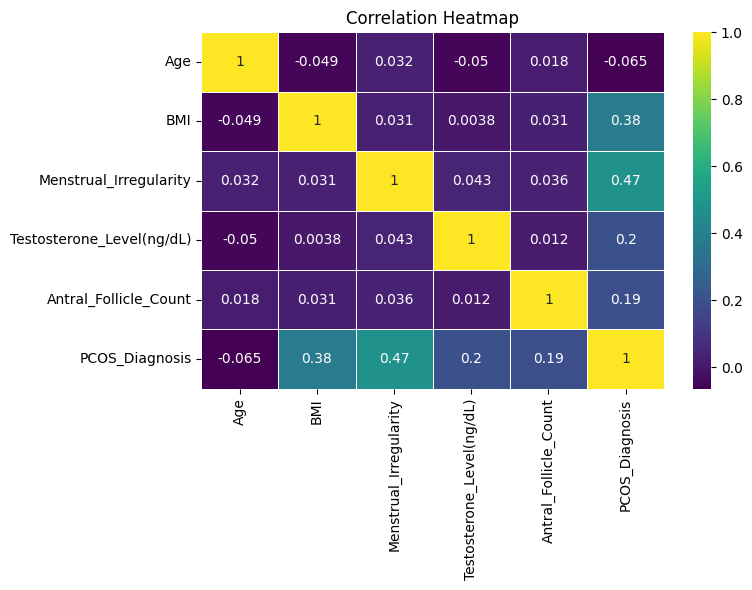

In [14]:
#pour évaluer les performances d’un modèle de classification (binaire ou multiclasse).
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

<ipython-input-15-e4b233dd6e04>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PCOS_Diagnosis',y=i,data=df,palette='viridis')


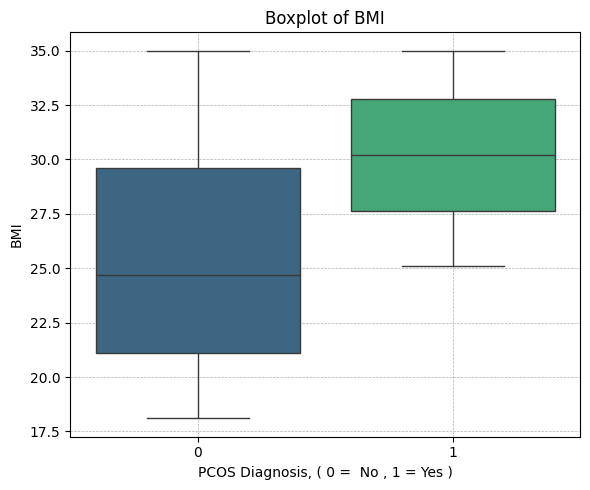

<ipython-input-15-e4b233dd6e04>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PCOS_Diagnosis',y=i,data=df,palette='viridis')


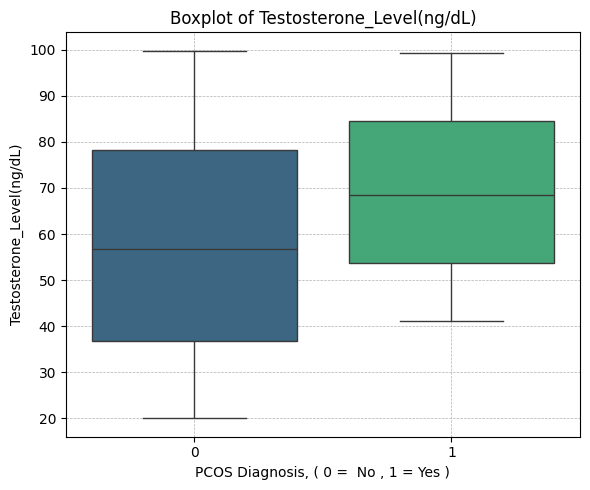

In [15]:
key_features = ['BMI','Testosterone_Level(ng/dL)']
for i in key_features:
  plt.figure(figsize=(6,5))
  sns.boxplot(x='PCOS_Diagnosis',y=i,data=df,palette='viridis')
  plt.xlabel('PCOS Diagnosis, ( 0 =  No , 1 = Yes )')
  plt.ylabel(i)
  plt.title("Boxplot of {}".format(i))
  plt.grid(linestyle = '--', linewidth = 0.5)
  plt.tight_layout()
  plt.show()
  print("\n")

Text(0.5, 1.0, 'Countplot of Menstrual Irregular')

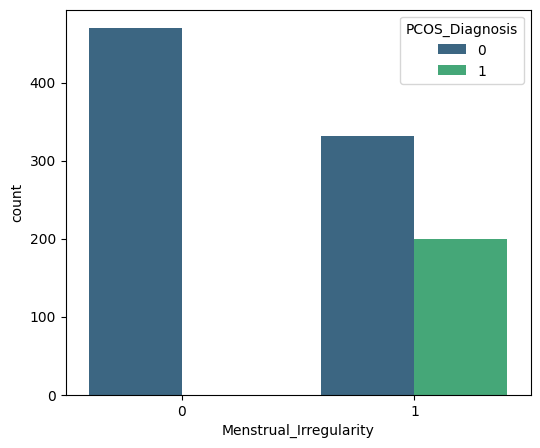

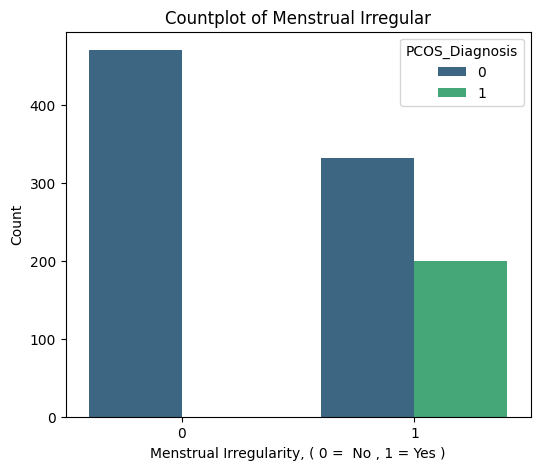

In [16]:
plt.figure(figsize=(6,5))
sns.countplot(x='Menstrual_Irregularity',hue='PCOS_Diagnosis',data=df,palette='viridis')
plt.figure(figsize=(6,5))
sns.countplot(x='Menstrual_Irregularity',hue='PCOS_Diagnosis',data=df,palette='viridis')
plt.xlabel('Menstrual Irregularity, ( 0 =  No , 1 = Yes )')
plt.ylabel('Count')
plt.title("Countplot of Menstrual Irregular")

**Prétraitement**

In [17]:
# Séparer les features et la cible
X = df.drop(columns=["PCOS_Diagnosis"])
y = df["PCOS_Diagnosis"]

In [18]:
# Vérifier le déséquilibre initial
print("Répartition avant équilibrage :", Counter(y))

# Scale features using StandardScaler
scaler = StandardScaler() # Initialize StandardScaler
X_scaled = scaler.fit_transform(X) # Fit and transform X to get X_scaled

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Vérifier la répartition après équilibrage
print("Répartition après SMOTE :", Counter(y_resampled))

Répartition avant équilibrage : Counter({0: 801, 1: 199})
Répartition après SMOTE : Counter({0: 801, 1: 801})


**Séparation**

In [19]:
# Séparer en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Modélisation**

In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost (Naive Bayes)": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       161
           1       0.72      0.67      0.69        39

    accuracy                           0.89       200
   macro avg       0.82      0.80      0.81       200
weighted avg       0.88      0.89      0.88       200

Confusion Matrix:
[[151  10]
 [ 13  26]]

Model: Random Forest
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.95      0.97        39

    accuracy                           0.99       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
[[161   0]
 [  2  37]]

Model: SVM
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       161
           1       0.89      0.87      0.88        39

    accuracy                          

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:54:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


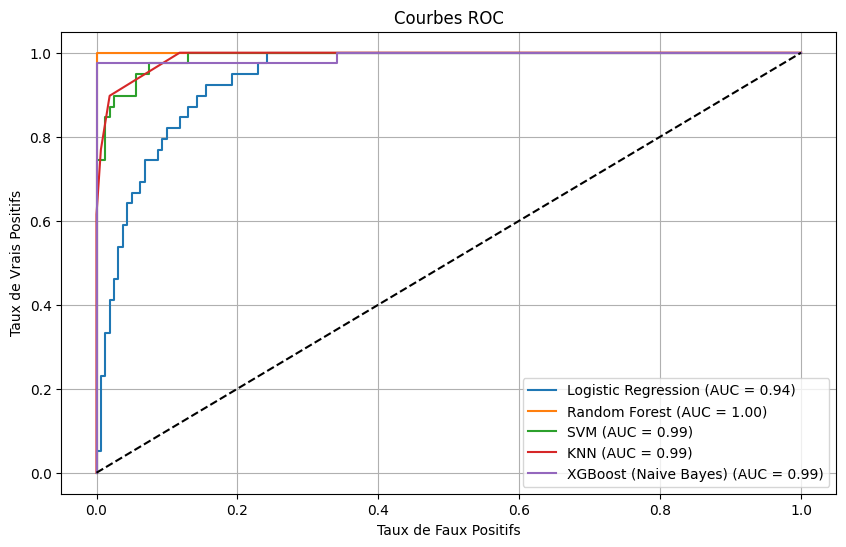

In [23]:
#Courbe ROC
plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Courbes ROC")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.legend()
plt.grid()
plt.show()



Logistic Regression


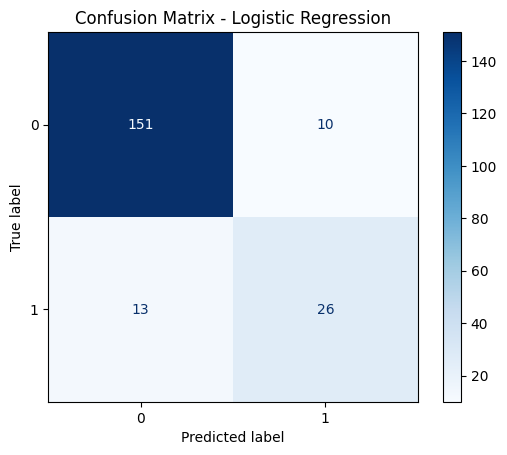


Random Forest


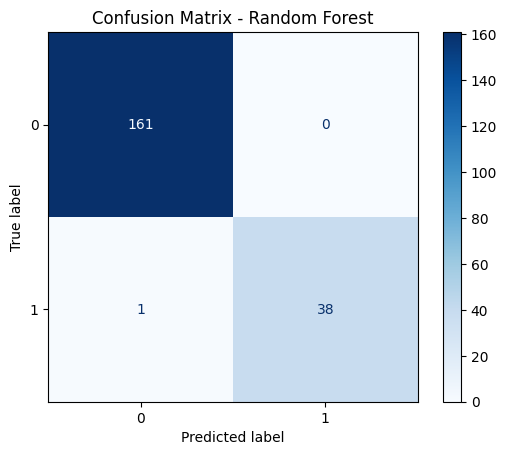


SVM


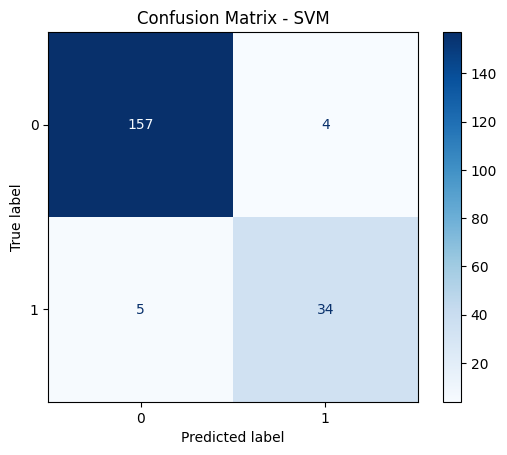


KNN


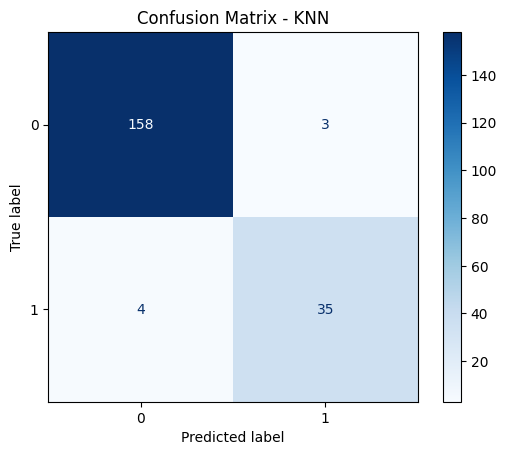


XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:54:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


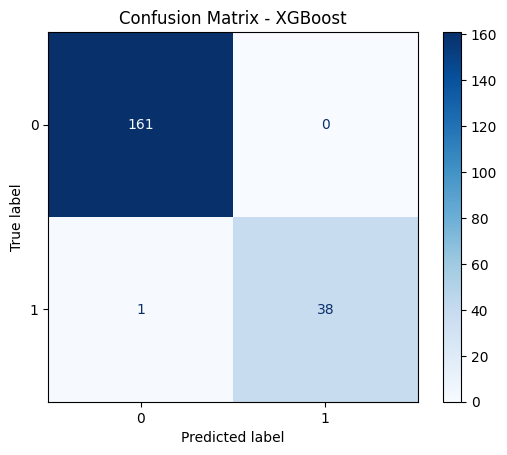

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dictionnaire de modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Entraîner et afficher la matrice de confusion pour chaque modèle
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Affichage graphique
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.show()


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost (Naive Bayes)": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# List to store model performance
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

# Convert to DataFrame for display
results_df = pd.DataFrame(results)
print(results_df)


                   Model  Accuracy  Precision  Recall  F1 Score
0    Logistic Regression     0.885   0.882022   0.885  0.883231
1          Random Forest     0.990   0.990123   0.990  0.989899
2                    SVM     0.955   0.954628   0.955  0.954777
3                    KNN     0.965   0.964729   0.965  0.964827
4  XGBoost (Naive Bayes)     0.995   0.995031   0.995  0.994975


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:54:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
